In [1]:
import torch
from cpclasses import *

<Axes: >

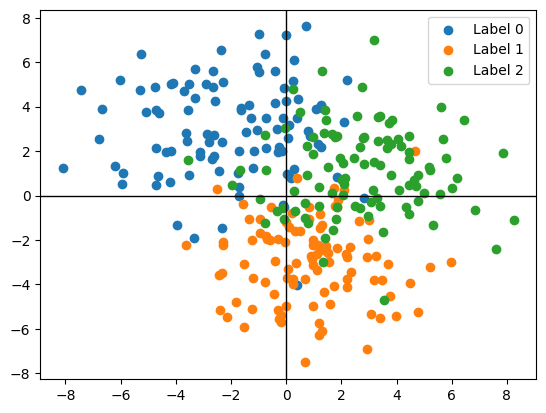

In [2]:
N_points = 100

datas_0 = torch.randn(N_points, 2) * 2 + torch.tensor([-2,3])
datas_1 = torch.randn(N_points, 2) * 2 + torch.tensor([0.5,-3])
datas_2 = torch.randn(N_points, 2) * 2 + torch.tensor([3,1])

datas = torch.stack((datas_0, datas_1, datas_2), dim=1).view(-1, 2)
labels = torch.cat((torch.zeros(N_points), torch.ones(N_points), 2 * torch.ones(N_points))).view(3, -1).T.flatten()

fig, ax = plt.subplots()

for i in range(3):
    ax.scatter(datas[labels == i, 0], datas[labels == i, 1], label=f"Label {i}")

ax.legend()
coordinate_axes(ax)



c:\users\tobia\alle_scripts\tobiasjohannessen.github.io\computational physics\exercises\comphyclasses\cpclasses\NeuralNetworks.py:428: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels_list, dtype = int)


Epoch 0, loss: 0.9591541290283203
Epoch 100, loss: 0.4683568775653839
Epoch 200, loss: 0.43293899297714233
Epoch 300, loss: 0.4215150475502014
Epoch 400, loss: 0.41635507345199585
Epoch 500, loss: 0.4136296212673187
Epoch 600, loss: 0.412039190530777
Epoch 700, loss: 0.4110385775566101
Epoch 800, loss: 0.410368412733078
Epoch 900, loss: 0.40989449620246887
Optimization finished with loss:  0.4095460772514343 



c:\Users\tobia\anaconda3\envs\py312\Lib\site-packages\torch\functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3610.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


<Axes: >

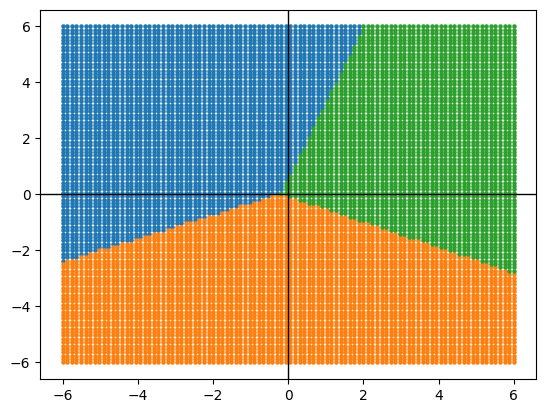

In [ ]:
#Train the Model
model = Classification(2, 3)
model.fit(datas, labels, epochs=1000)



#Plot a grid and label it using the trained model
fig, ax = plt.subplots()
grid = torch.stack(torch.meshgrid(torch.linspace(-6, 6, 100), torch.linspace(-6, 6, 100)), dim=2).view(-1, 2)

pred = model.predict_label(grid)

for i in range(3):
    ax.scatter(grid[pred == i, 0], grid[pred == i, 1], s=5)

coordinate_axes(ax)


# Non-trivial 2D-classification

In [4]:
def f(x1, x2):
    return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

def label(x1, x2):
    if f(x1, x2) <= 25:
        return 0
    if (f(x1, x2) > 25) and (f(x1, x2) <= 300):
        return 1
    return 2



for i in range(10):
    x1, x2 = torch.randn(2) * 5
    print(f"({x1:.2f}, {x2:.2f}) -> {label(x1, x2)}")


(5.88, 1.38) -> 2
(-4.39, 1.22) -> 1
(11.49, -2.34) -> 2
(4.88, -1.82) -> 1
(4.42, -2.09) -> 1
(-1.16, 4.60) -> 1
(9.17, -1.24) -> 2
(-6.09, 6.37) -> 2
(-6.38, 2.09) -> 2
(1.50, -2.27) -> 1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='x', ylabel='y'>

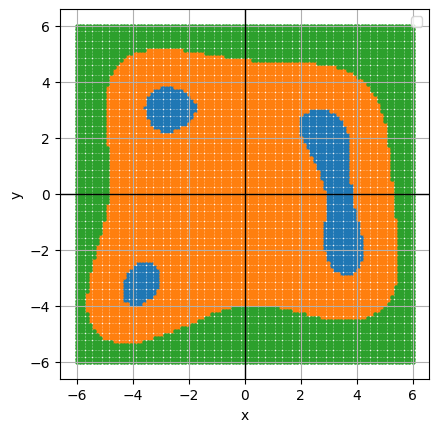

In [5]:
fig, ax = plt.subplots()
grid = torch.stack(torch.meshgrid(torch.linspace(-6, 6, 100), torch.linspace(-6, 6, 100)), dim=2).view(-1, 2)

labels = torch.tensor([label(x1, x2) for x1, x2 in grid])

for i in range(3):
    ax.scatter(grid[labels == i, 0], grid[labels == i, 1], s=5)

coordinate_axes(ax)
format_axis(ax, 'x', 'y')

In [6]:
# Divide the grid into 80% training, 10% validation and 10% testing
N_points = grid.shape[0]
N_train = int(0.8 * N_points)

indices = torch.randperm(N_points)

train_indices = indices[:N_train]
val_indices = indices[N_train:int(0.9 * N_points)]
test_indices = indices[int(0.9 * N_points):]

train_data = grid[train_indices]
train_labels = labels[train_indices]
training_dataset = CustomDataset(train_data, train_labels)
training_loader = DataLoader(training_dataset, batch_size=128, shuffle=True)



val_data = grid[val_indices]
val_labels = labels[val_indices]
validation_dataset = CustomDataset(val_data, val_labels)
validation_loader = DataLoader(validation_dataset, batch_size=128, shuffle=False)


test_data = grid[test_indices]
test_labels = labels[test_indices]
test_dataset = CustomDataset(test_data, test_labels)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

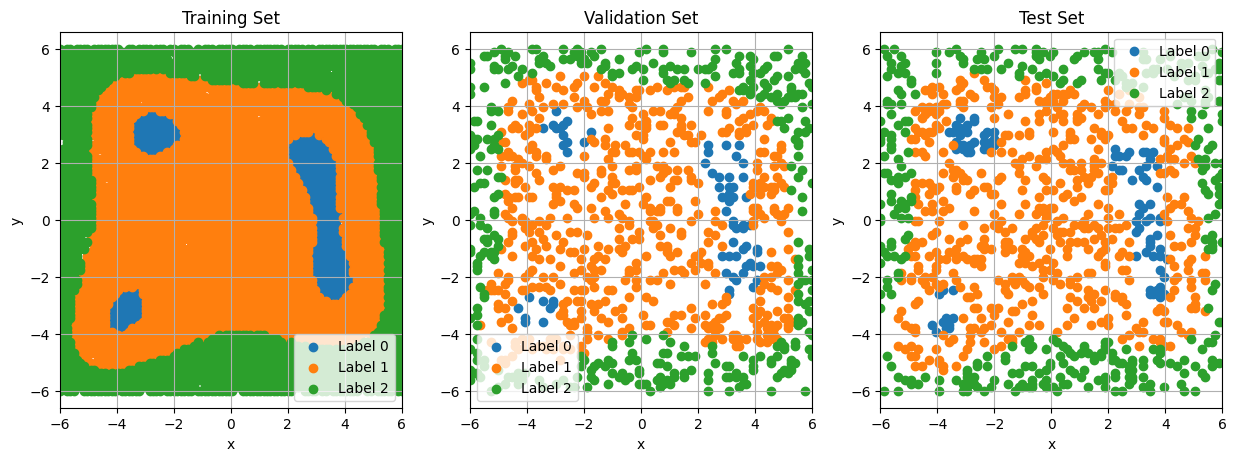

In [7]:

fig, axs = plt.subplots(1,3, figsize=(15,5))

titles = ["Training Set", "Validation Set", "Test Set"]
for loader, ax in zip([training_loader, validation_loader, test_loader], axs):

    for i in range(3):
        ax.scatter(loader.dataset.features[loader.dataset.labels == i, 0], loader.dataset.features[loader.dataset.labels == i, 1], label=f"Label {i}")

    format_axis(ax, title=titles.pop(0))
    ax.set(xlim = (-6, 6))

In [8]:
training_loader.dataset.__getitem__(0)

for batch in training_loader:
    print(batch[0][0], batch[1][0])
    break


tensor([ 3.8182, -2.0000]) tensor(0)


In [9]:
model1 = Classification_I(2,3)
model2 = Classification_II(2,3)
model3 = Classification_III(2,3)

model1.fit_loader(training_loader, validation_loader, epochs=1000, patience=100)
model2.fit_loader(training_loader, validation_loader, epochs=1000, patience=100)
model3.fit_loader(training_loader, validation_loader, epochs=1000, patience=100)



Epoch 0 
 Training loss: 2.0417375192642213 
 Validation loss: 1.3509420833587646
Epoch 250 
 Training loss: 0.8772031807899475 
 Validation loss: 0.8673712568283081
Epoch 500 
 Training loss: 0.8770279192924499 
 Validation loss: 0.8671081595420838
Epoch 750 
 Training loss: 0.8772212810516358 
 Validation loss: 0.8672536783218384
Optimization finished with loss:  0.8676933994293213 

Epoch 0 
 Training loss: 1.0575292687416076 
 Validation loss: 0.9673068137168884
Epoch 250 
 Training loss: 0.31824114513397217 
 Validation loss: 0.3148913457393646
Epoch 500 
 Training loss: 0.25912029802799225 
 Validation loss: 0.2508099867105484
Epoch 750 
 Training loss: 0.23692131328582763 
 Validation loss: 0.22799336445331572
Optimization finished with loss:  0.2107181544303894 

Epoch 0 
 Training loss: 1.1106740217208861 
 Validation loss: 0.9971411843299866
Epoch 250 
 Training loss: 0.1333936233520508 
 Validation loss: 0.1413946567773819
Epoch 500 
 Training loss: 0.07967947602272034 
 Val

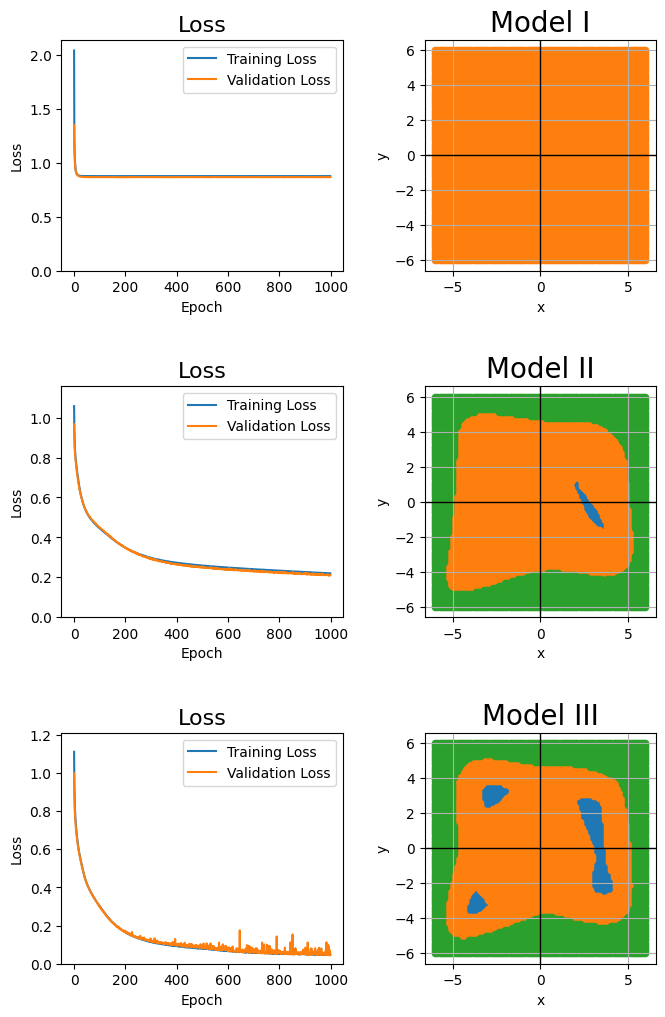

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(8, 12), gridspec_kw={'hspace': 0.5})
axs = axs.reshape(-1,2)

models = [model1, model2, model3]

grid = torch.stack(torch.meshgrid(torch.linspace(-6, 6, 100), torch.linspace(-6, 6, 100)), dim=2).view(-1, 2)

titles = ["Model I", "Model II", "Model III"]

for ax, model, title in zip(axs, models, titles):
    
    predicted_labels = model.predict_label(grid)
    ax[0].plot(model.train_loss, label="Training Loss")
    ax[0].plot(model.val_loss, label="Validation Loss")
    for i in range(3):
        ax[1].scatter(grid[predicted_labels == i, 0], grid[predicted_labels == i, 1], s=20, label=f"Label {i}")

   
    ax[0].set(ylim = (0,model.train_loss[0] + 0.1), xlabel="Epoch", ylabel="Loss")
    ax[0].legend()

    ax[0].set_title("Loss", fontsize=16)
    ax[1].set_title(title, fontsize=16)
    
    format_axis(ax[1], 'x', 'y', legend=False)


save_plot(fig, "classification_comparison.png", bbox_inches='tight')